----

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.
Como primer paso hay que importar o abrir la libreria de pandas,el segundo paso es leer que contiene los conjuntos de datos en los DataFrame con el metodo head() y si queremos explorar un poco mas ejecutaremos el metodo info(). 

In [10]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# leer conjuntos de datos en los DataFrames
df_1 = pd.read_csv("instacart_orders.csv", sep=";")
print(df_1.head())
df_1.info()

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-nul

In [12]:
# mostrar información del DataFrame
df_2 = pd.read_csv("products.csv", sep=";")
print(df_2.head())
df_2.info()

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
# mostrar información del DataFrame
df_3 = pd.read_csv("aisles.csv", sep=";")
print(df_3.head())
df_3.info()

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [14]:
# mostrar información del DataFrame
df_4 = pd.read_csv("departments.csv", sep=";")
print(df_4.head())
df_4.info()

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [15]:
# mostrar información del DataFrame
df_5 = pd.read_csv("order_products.csv", sep=";")
print(df_5.head())
df_5.info(show_counts=True)

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
Al principio vimos que no se leyo de manera correcta los conjuntos de datos y puesto que los datos estaban comprimidos y separados por punto y coma, se tiene  que utilizar el separador sep e indicarle que cambie el punto y coma por comas.



# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
Tenemos que revisar cada conjunto de datos y ver que es lo que contiene y dependiendo aplicar los metodos duplicated para saber cuantos hay duplicados y metodo count para contarlos,despues para algunos casos filtrar para algunas columnas.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [16]:
# Revisa si hay pedidos duplicados
df_1[df_1.duplicated()].count()

order_id                  15
user_id                   15
order_number              15
order_dow                 15
order_hour_of_day         15
days_since_prior_order    13
dtype: int64

In [17]:
df_1[df_1.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Que hay 15 filas duplicadas y tienen en comun el dia y la hora en que ocurre (miercoles 2a.m).

In [18]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_1[(df_1["order_dow"]==3)&(df_1["order_hour_of_day"]==2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado? 
Al parecer hubo una falla puntual el miercoles a las 2 am que hizo que se duplicaran 15 pedidos. 

In [19]:
# Elimina los pedidos duplicados
df_1 = df_1.drop_duplicates()

In [20]:
# Vuelve a verificar si hay filas duplicadas
df_1[df_1.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [21]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
df_1[df_1.duplicated(subset="order_id")]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos
Que no hay duplicados en los ID y tambien que no hay duplicados implicitos.

### `products` data frame

In [22]:
# Verifica si hay filas totalmente duplicadas
df_2[df_2.duplicated()]

,product_id,product_name,aisle_id,department_id


In [23]:
# Revisa únicamente si hay ID de productos duplicados
df_2[df_2.duplicated(subset="product_id")]

,product_id,product_name,aisle_id,department_id


In [24]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_2['product_name'] = df_2['product_name'].str.upper()
df_2[df_2.duplicated(subset="product_name")]

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [25]:
# Revisa si hay nombres duplicados de productos no faltantes
df_2[(df_2.duplicated(subset="product_name"))&~(df_2["product_name"].isna())]

,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos
Que habia muchos duplicados en el nombre pero eran duplicados vacios y ya no hay duplicados porque los ID son unicos y son los que mandan.

### `departments` data frame

In [26]:
# Revisa si hay filas totalmente duplicadas
df_4[df_4.duplicated()]

,department_id,department


In [27]:
# Revisa únicamente si hay IDs duplicadas de departamentos
df_4[df_4.duplicated(subset="department_id")]

,department_id,department


Describe brevemente tus hallazgos y lo que hiciste con ellos. Que ya no hay duplicados en nuestra tabla porque el resultado nos da 0.

### `aisles` data frame

In [28]:
# Revisa si hay filas totalmente duplicadas
df_3[df_3.duplicated()]

,aisle_id,aisle


In [29]:
# Revisa únicamente si hay IDs duplicadas de pasillos
df_3[df_3.duplicated(subset="aisle_id")]

,aisle_id,aisle


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Igual que el anterior ya no tenemos duplicados en nuestra tabla porque el resultado es 0.

### `order_products` data frame

In [30]:
# Revisa si hay filas totalmente duplicadas
df_5[df_5.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


In [31]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_5[df_5.duplicated(subset=["order_id","add_to_cart_order"])&~(df_5["add_to_cart_order"].isna())]

,order_id,product_id,add_to_cart_order,reordered


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Aqui vemos que no hay duplicados y que los duplicados engañosos son los duplicados implicitos y que se tuvieron que revisar en combinacion porque identifica de manera unica a cada fila.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [32]:
# Encuentra los valores ausentes en la columna 'product_name'
df_2[df_2["product_name"].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.
Que las columnas aisle_id y department_id tienen filas iguales y podemos conjeturar que ahi tienen problemas.

In [33]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100
df_2[(df_2["aisle_id"]!=100)&(df_2["product_name"].isna())]

,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.
Todos los productos de nombre nulo son del pasillo 100 porque cuando buscamos cuales no eran del pasillo 100 no encontramos ninguno

In [34]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_2[(df_2["department_id"]!=21)&(df_2["product_name"].isna())]

,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.
Igual que el anterior todos los productos de nombre nulo son del departamento 21 porque cuando buscamos cuales no eran del departamento 21 no encontramos ninguno.

In [35]:
df_3

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [36]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
df_3[df_3["aisle_id"]==100]

,aisle_id,aisle
99,100,missing


In [37]:
df_4[df_4["department_id"]==21]

,department_id,department
20,21,missing


Describe brevemente cuáles son tus hallazgos.
Podemos concluir que en los catalogos estan perdidos los datos correspodientes a la descripcion  tanto del pasillo 100 como del departamento 21.Esto podria ser una causa del porque de los productos ligados a estos datos se encuentran nulos. 

In [38]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [39]:
# Completa los nombres de productos ausentes con 'Unknow
df_2["product_name"] = df_2["product_name"].fillna("unknow")
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se observo que la columna produc_name efectivamente tenia valores nulos pues el .info()
nos mostraba que tenia solo 48436, y una vez que se aplico el metodo de rellenado de nulos se consiguio que la columna tubiera el total de datos esperado.

### `orders` data frame

In [40]:
# Encuentra los valores ausentes
df_1[df_1["days_since_prior_order"].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [41]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_1[(df_1["days_since_prior_order"].isna())&(df_1["order_number"]!=1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Que no hay numeros  diferentes al primer pedido además que el resultado nos da 0.

### `order_products` data frame

In [42]:
# Encuentra los valores ausentes
df_5[df_5['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [43]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_5['add_to_cart_order'].min())
print(df_5['add_to_cart_order'].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos.
Que una o varias personas agregarón  hasta 64 articulos.

In [44]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_nan=df_5[df_5['add_to_cart_order'].isna()]
order_nan=order_nan["order_id"].unique()
order_nan

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [45]:
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
order_aus=df_5[df_5["order_id"].isin(order_nan)]
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
order_aus=order_aus.groupby("order_id").size()
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
order_aus.sort_values()

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Length: 70, dtype: int64

Describe brevemente cuáles son tus hallazgos.
Primero guardamos en una nueva variable los pedidos ausentes por su order_id de cada pedido y luego agrupamos el numero de product_id en cada pedido y por ultimo aplicamos el metodo sort_values para ordenarlos y ver que hay mas de 64 productos.

In [46]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_5["add_to_cart_order"]=df_5["add_to_cart_order"].fillna(999).astype("int")
df_5.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Que ya podemos ver en cada columna tienen 4545007 no nulos y del typo int64, con la columna add_to_cart_ order llamanos a fillna para rellenarlo con 999 y astype para cambiarlo a entero.


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
Podemos concluir que se tuvieron que hacer varios pasos o procesos  empleando los metodos necesarios tanto para realizar y obtener los resultados esperados de los valores ausentes y valores duplicados todo para limpiar o procesar nuestros conjuntos de datos.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [47]:
df_1["order_hour_of_day"].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [48]:
df_1["order_dow"].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

Escribe aquí tus conclusiones
Primero filtramos nuestras columnas order_hour_of_day y order_dow y utilizamos los metodos sort_values( ) y unique() para ordenar y obtener los valores unicos de nuestra Series.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

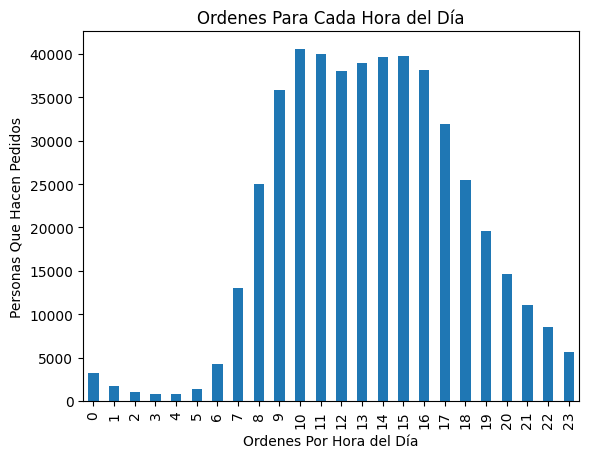

In [49]:
df_1.groupby('order_hour_of_day')["user_id"].count().plot(kind= "bar",
                                                          title="Ordenes Para Cada Hora del Día",
                                                          xlabel="Ordenes Por Hora del Día",
                                                          ylabel="Personas Que Hacen Pedidos"
                                                         )
plt.show();

Escribe aquí tus conclusiones
Que utilizamos el metodo Groupby()para agrupar y el metodo count,para contar y en la grafica vemos que a las 10 horas es donde las personas hacen mas pedidos.

### [A3] ¿Qué día de la semana compran víveres las personas?

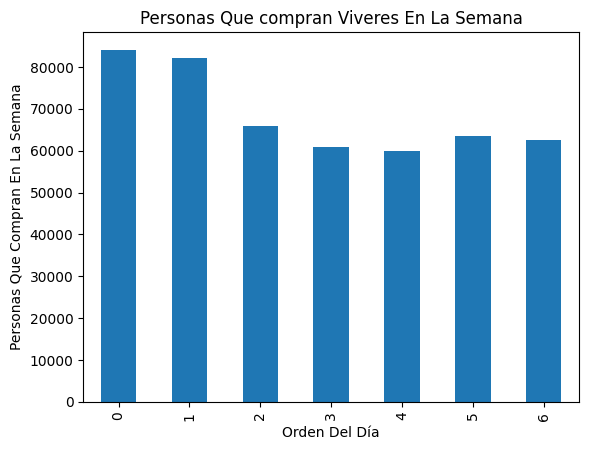

In [50]:
df_1.groupby("order_dow")["user_id"].count().plot(kind= "bar",
                                                  title="Personas Que compran Viveres En La Semana",
                                                  xlabel="Orden Del Día",
                                                  ylabel="Personas Que Compran En La Semana"
                                                 )
plt.show();

Escribe aquí tus conclusiones
Seguimos con nuestros metodos groupby() y count(), y en la grafica vemos que el dia Domingo es el día donde hacen mas pedidos las Personas.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

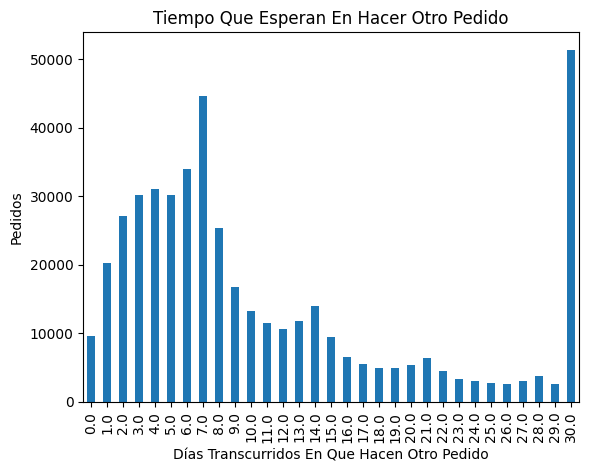

In [51]:
df_1.groupby('days_since_prior_order')["user_id"].count().plot(kind="bar",
                                                               title="Tiempo Que Esperan En Hacer Otro Pedido",
                                                               xlabel="Días Transcurridos En Que Hacen Otro Pedido",
                                                               ylabel="Pedidos"
                                                              )
plt.show();

Escribe aquí tus conclusiones
Seguimos con nuestro metodos groupby() y count(), y en la grafica vemos como el día 29 como valor minimo y 30 como el valor maximo que son los dias en que trancurren en hacer pedidos es decir 1 día de diferencia.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [52]:
#filtrar datos para el miercoles
miercoles=df_1[df_1["order_dow"]==3]

#extraer la columna order_hour_of_day
order_mier=miercoles["order_hour_of_day"]

#contar y ordenar valores
order_mier=order_mier.value_counts().sort_index()
order_mier

order_hour_of_day
0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: count, dtype: int64

In [53]:
#filtrar datos para el sabado
sabado=df_1[df_1["order_dow"]==6]

#extraer la columna order_hour_of_day
order_sab=sabado["order_hour_of_day"]

#contar y ordenar valores
order_sab=order_sab.value_counts().sort_index()
order_sab

order_hour_of_day
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: count, dtype: int64

In [54]:
dif_horas=pd.concat([order_mier,order_sab],axis="columns")
dif_horas.columns=["miercoles","sabado"]
dif_horas

,miercoles,sabado
order_hour_of_day,,
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246


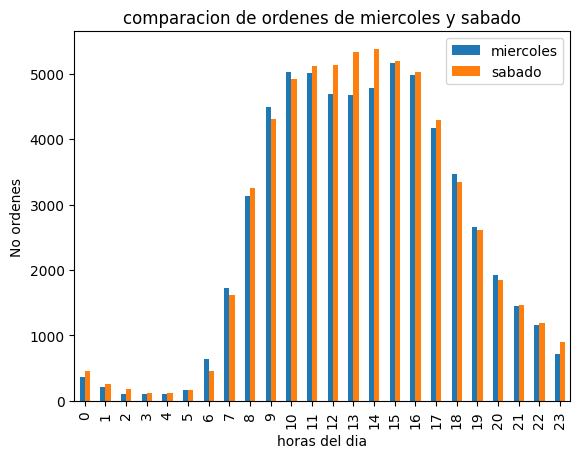

In [55]:
dif_horas.plot(
    kind="bar",
    title="comparacion de ordenes de miercoles y sabado",
    xlabel="horas del dia",
    ylabel="No ordenes"
)
plt.show();

Escribe aquí tus conclusiones
Aqui tuvimos que filtrar tanto para el miercoles y sabado, extraer la columna order_hour_of_day,  contar y ordenar los valores con los metodos value_counts() y sort_index() despues utilizamos el metodo concat() y columns () para juntar los días y en la grafica vemos que a las 14 hrs del sabado hay mas numero de ordenes.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [56]:
num_pedidos=df_1.groupby("user_id")["order_id"].count().sort_values()
num_pedidos

user_id
152331     1
139876     1
60408      1
139873     1
139871     1
          ..
66664     24
148162    24
78375     25
193164    26
149605    28
Name: order_id, Length: 157437, dtype: int64

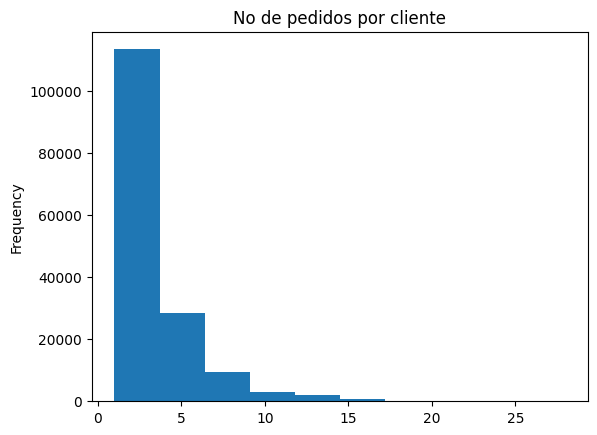

In [57]:
num_pedidos.plot(kind="hist",
                 title="No de pedidos por cliente",
                )
plt.show();

Escribe aquí tus conclusiones
Volvimos a utilizar el metodo groupby() y count() junto con el metodo sort_values() para ordenar nuestra tabla y en la grafica vemos que hay mas 100000 pedidos por cliente. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [58]:
prod_pop=pd.merge(df_5,df_2)
prod_pop.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,567889,1560,1,1,BAG OF ICE,37,1
2,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91,16
3,491251,8670,35,1,DICED TOMATOES,81,15
4,2571142,1940,5,1,ORGANIC 2% REDUCED FAT MILK,84,16


In [59]:
veinte_pop=prod_pop.groupby(["product_id","product_name"])\
                    .size()\
                    .sort_values(ascending=False)\
                    .head(20)
veinte_pop                                                                                                  

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
dtype: int64

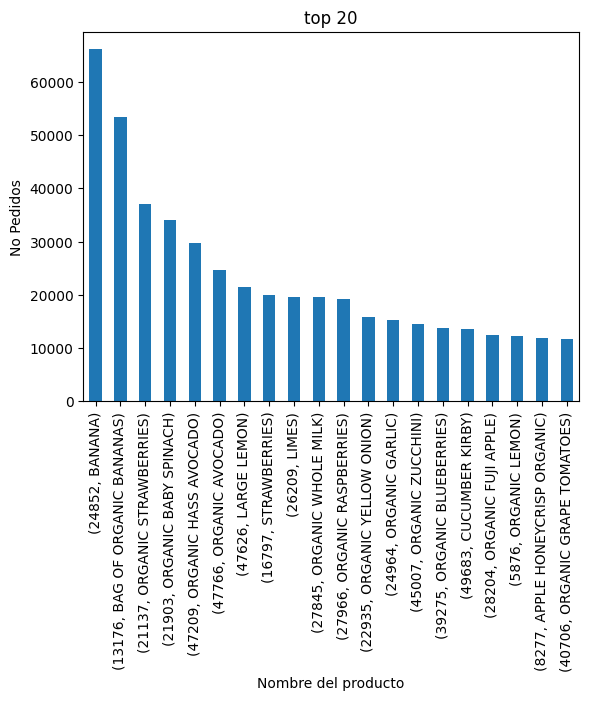

In [60]:
veinte_pop.plot(kind="bar",
                title="top 20",
                xlabel="Nombre del producto",
                ylabel="No Pedidos"
               )
plt.show();

Escribe aquí tus conclusiones
En este caso primero usamos el metodo merge() para nuestros conjunto de datos products y order_products luego tambien los metosos groupby(),size(),sort_values() y head()para agrupar,ordenar y que nos diera los 20 productos mas populares, luego en la grafica vemos los productos mas solicitados o populares.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [61]:
art_ped=df_5.groupby("order_id")["product_id"].count().value_counts().sort_index()
art_ped

product_id
1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: count, Length: 90, dtype: int64

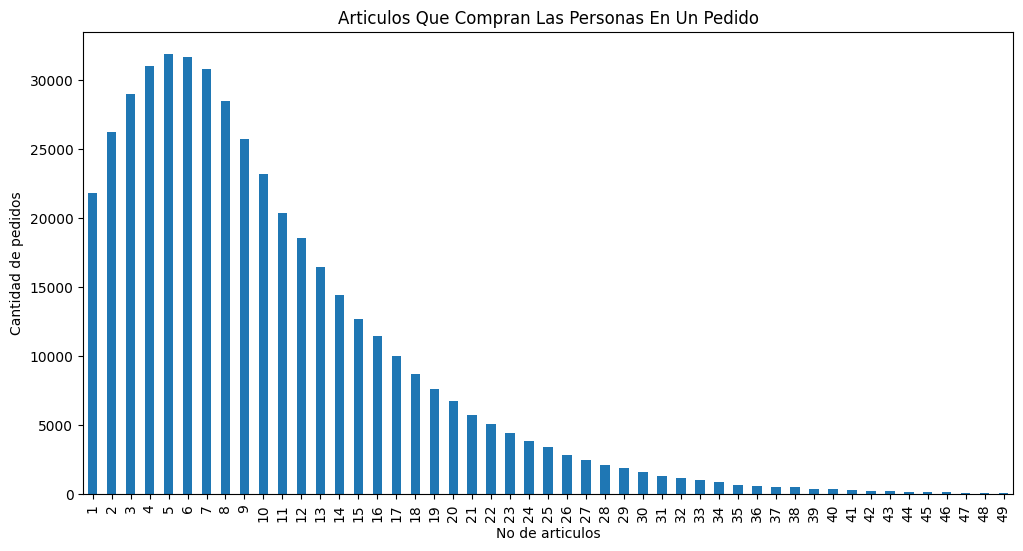

In [62]:
art_ped[art_ped.index<50].plot(kind="bar",
             title="Articulos Que Compran Las Personas En Un Pedido",
             xlabel="No de articulos",
             ylabel="Cantidad de pedidos",
             figsize=[12,6]
            )
plt.show();

Escribe aquí tus conclusiones
Volvimos a emplear el metodo groupby(),count(),value_counts() y sort_index() para agrupar,contar, ordenar y en la grafica vemos la cantidad de articulos que compran las personas en un pedido,tambien agregamos index para reducir el numero de articulos en nuestra lista y se vea mejor en la grafica.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [63]:
#filtrar dataset reordered
fil_reo=df_5.loc[df_5['reordered'] == 1]
fil_reo=fil_reo.merge(df_2,on=["product_id"])

In [64]:
fil_reo.groupby(["product_id","product_name"])["order_id"].count().sort_values(ascending=False).head(20)

product_id  product_name            
24852       BANANA                      55763
13176       BAG OF ORGANIC BANANAS      44450
21137       ORGANIC STRAWBERRIES        28639
21903       ORGANIC BABY SPINACH        26233
47209       ORGANIC HASS AVOCADO        23629
47766       ORGANIC AVOCADO             18743
27845       ORGANIC WHOLE MILK          16251
47626       LARGE LEMON                 15044
27966       ORGANIC RASPBERRIES         14748
16797       STRAWBERRIES                13945
26209       LIMES                       13327
22935       ORGANIC YELLOW ONION        11145
24964       ORGANIC GARLIC              10411
45007       ORGANIC ZUCCHINI            10076
49683       CUCUMBER KIRBY               9538
28204       ORGANIC FUJI APPLE           8989
8277        APPLE HONEYCRISP ORGANIC     8836
39275       ORGANIC BLUEBERRIES          8799
5876        ORGANIC LEMON                8412
49235       ORGANIC HALF & HALF          8389
Name: order_id, dtype: int64

Escribe aquí tus conclusiones
Aqui primero filtramos el dataset reordered,luego utilizamos merge()para nuestro conjunto de datos products, despues utilizamos los metodos groupby(),count(),sort_values y head()para agrupar, contar, ordenar la tabla y head para que nos diera los 20 productos que vuelven a pedirse.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [65]:
# fusionar datos de ordenes y productos
prod_vec=pd.merge(df_5,df_2)

In [66]:
prod_vec.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,567889,1560,1,1,BAG OF ICE,37,1
2,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91,16
3,491251,8670,35,1,DICED TOMATOES,81,15
4,2571142,1940,5,1,ORGANIC 2% REDUCED FAT MILK,84,16


In [67]:
#resumir la informacion usan el product_id product name y obteniendo el promedio de reordered
prom=prod_vec.groupby(["product_id","product_name"])["reordered"].mean()
prom.head()

product_id  product_name                                                     
1           CHOCOLATE SANDWICH COOKIES                                           0.564286
2           ALL-SEASONS SALT                                                     0.000000
3           ROBUST GOLDEN UNSWEETENED OOLONG TEA                                 0.738095
4           SMART ONES CLASSIC FAVORITES MINI RIGATONI WITH VODKA CREAM SAUCE    0.510204
7           PURE COCONUT WATER WITH ORANGE                                       0.500000
Name: reordered, dtype: float64

Escribe aquí tus conclusiones
Primero fusionamos nuestros conjuntos de datos products y order_products con el metodo merge() y aplicamos head() para que nos diera los primeros cinco datos, luego utilizamos el metodo groupby(),mean()y head() para agrupar,sacar el promedio a la columna reordered y mostra los primeros cinco datos del dataset.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [68]:
# fusionar los  datos de ordenes de product y pedidos de la aplicacion
cad_clin=pd.merge(df_5,df_1)

In [69]:
cad_clin.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17,0,58454,25,0,15,8.0
1,567889,1560,1,1,129474,16,1,13,14.0
2,2261212,26683,1,1,47476,5,6,9,13.0
3,491251,8670,35,1,134505,27,6,13,9.0
4,2571142,1940,5,1,155995,22,5,13,5.0


In [70]:
#resumir la informacion del usuario y el promedio de veces que pidio el producto
cad_clin.groupby("user_id")["reordered"].mean()

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

Escribe aquí tus conclusiones
Se volvio a fusionar nuestros conjunto de datos orders y order_product con el metodo merge() y el metodo head para que nos diera los primeros cinco datos, luego utilizamos el metodo groupby() y mean() para agrupar y sacar el promedio.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [71]:
fil_add=df_5.loc[df_5['add_to_cart_order'] == 1]
fil_add=fil_add.merge(df_2,on="product_id")

In [72]:
fil_add.groupby(["product_id","product_name"])["product_id"].count().sort_values(ascending=False).head(20) 

product_id  product_name               
24852       BANANA                         15562
13176       BAG OF ORGANIC BANANAS         11026
27845       ORGANIC WHOLE MILK              4363
21137       ORGANIC STRAWBERRIES            3946
47209       ORGANIC HASS AVOCADO            3390
21903       ORGANIC BABY SPINACH            3336
47766       ORGANIC AVOCADO                 3044
19660       SPRING WATER                    2336
16797       STRAWBERRIES                    2308
27966       ORGANIC RASPBERRIES             2024
44632       SPARKLING WATER GRAPEFRUIT      1914
49235       ORGANIC HALF & HALF             1797
47626       LARGE LEMON                     1737
196         SODA                            1733
38689       ORGANIC REDUCED FAT MILK        1397
26209       LIMES                           1370
12341       HASS AVOCADOS                   1340
5785        ORGANIC REDUCED FAT 2% MILK     1310
27086       HALF & HALF                     1309
43352       RASPBERRIES      

Escribe aquí tus conclusiones 
Primero filtramos add_to_cart_order,luego utilizamos merge()para nuestro conjunto de datos product y volvimos a utilizar el metodo groupby() y el metodo count() para agrupar y contar, también utilizamos el metodo sort_value() y head() para ordenar nuestros datos y head para que nos diera los 20 productos que las personas meten primero al carrito.

### Conclusion general del proyecto: